In [1]:
using Plots
plotlyjs()
scatter(1:10,1:10,1:10,marker_z=1:10,seriescolor=:darkrainbow,alpha=0.5)

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-940945500553557406\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-14972713608921741480\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-940945500553557406\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [101]:
include(joinpath("..","src","test.jl"))

In [3]:
include(joinpath("..","src","io.jl"))

makeCoordinates (generic function with 1 method)

In [27]:
Q,lastQ,ang_idxs,ang_vals = readSingleSimulation(joinpath("..","outputs","test","3_1"))
idxs = [i for i in 1:length(ang_idxs) if ang_idxs[i] != 0 ];

In [28]:
n = 10
function getNth(n)
    newQ = copy(Q)
    for i in 1:n
        val = idxs[i]
        rotate!(newQ,ang_idxs[val],ang_vals[val])
    end
    return newQ
end

getNth (generic function with 1 method)

In [29]:
newQ = getNth(10)

PolygonalChain(Point[Point(2.700210962222457360466033949144789018008125582309552765292803943143816886264906, -1.300140641481638120948051603751466324584441981308972846523913019145862496026012, -1.472425885077432701119080122511811778436900704387263161378032630610413784255264), Point(0.0, 0.499999999999999944488848768742172978818416595458984375, 0.86602540378443870761060452423407696187496185302734375), Point(0.1305359328589262910018027475279166199207009989559084201622041205894133993003134, -0.01194925900574404154226337401607887129609330068510888436333025790439518905224912, 0.01698575427676135868852868239712423455503258408579566353345345288262464592834833), Point(1.117308177205191454983132258111267471514100944098999594856712091061469434316211, 0.1381703942686009493713441634535578233713641399654439587877948009269600913306241, 0.07817911575188543416499704917358154960034527503025058397873686027975655214477615), Point(1.00877878539799456477186248074622374727701349935737500326004245634925681763

In [6]:
val = idxs[n+1];
ang_idxs[val]
ang_vals[val]

-0.024233876146574941101707878488014102913439273834228515625

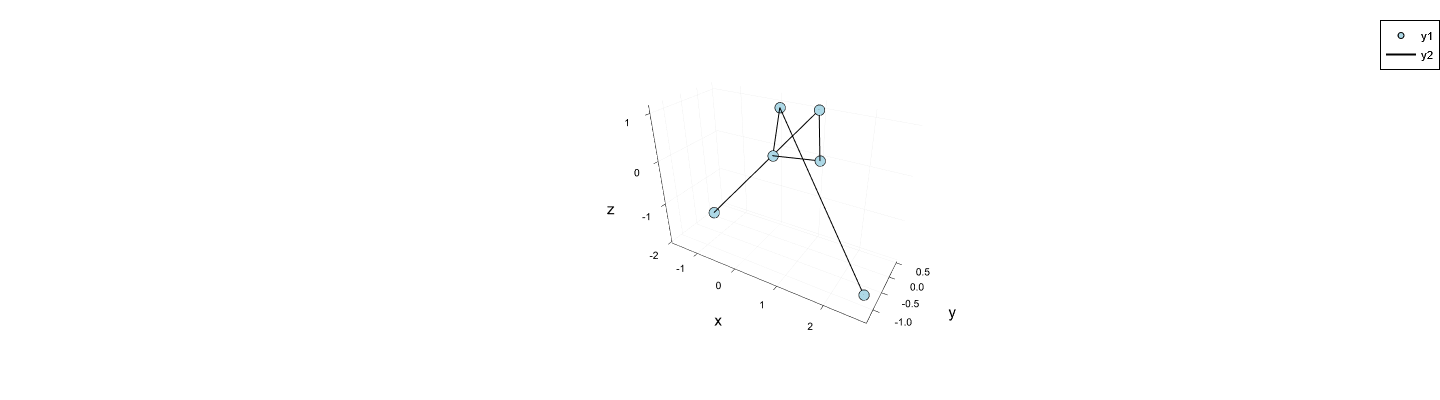

In [7]:
p = plot()
#idx = ang_idxs[val]-length(Q)+2
#newQ = moveBeforeDihedral(newQ,ang_idxs[val])
plotChain!(newQ,"lightBlue")
#scatter!([0.5232793339871631928522654266168180423450881633232744104871902361491301550302779], [-0.0658911831588024193851724688818526659937386821456750880337932984697413449266494], [-0.5418394643407484699170193893035299702736701533521861807064364237305791696438268])
#newPoint = newQ[5]+ 0.1890358620925512979458086846097662286411199754438268912524356569910176426912083*(newQ[6]-newQ[5])
#scatter!([newPoint.x],[newPoint.y],[newPoint.z])
display(p)

In [8]:
newQ2=moveBeforeDihedral(newQ,ang_idxs[val])

PolygonalChain(Point[Point(1.398531842057421138050478046177174263449732310962123062640893903540403893715673, -1.29280055631374581485365580076504028559052502836881030187062328179999786913717, -2.830702362296934849556219846523394163281265327518343273233829013065478238709465), Point(-1.023501869527503893186235003712852865159814141746581947909058426694380718941398, 0.2877951587343991165192824520102588957929145635653871043225020753701873617420367, -0.06746696054094337340621935883831003816703916771320319013376671602016577538500257), Point(-0.9882751938010597267294749305064116730253615123464426179439438802602180856559045, -0.1489334853661860364919324665821460710513213317933405350972976627243266952956995, -0.9663702772215129908625243354762989325911020667602454300070951766382929529911511), Point(1.079521069386805578173293982850049946389500045554535173127962933771073975395303e-78, 0.0, -1.000000000000000000000000000000000000000000000000000000000000000000000000000017), Point(0.0, 0.0, 0.0), Point

In [9]:
checkRotationIntersection(newQ2,ang_idxs[val],ang_vals[val],false,debug=true)

3
5
5,1
caso 1
(2, 15.92488886251268643889724365755661844455326007290162106057650407113809598393732, 0.8234346861602840297183081515371024704290263002525215723954665153781576015828596)
la raíz esta bien
Point(-0.5958547271111394907858872737298088486975103496136277275323958322168655657187246, 0.008716780253213132157318543286457594047459093256709020863985987921041456729663116, -0.555358486465003654520229203662371612250964159469518198588019321379028111703902)
-2.727088502960679941520333060335940194363720329604662991892581479962060398464962,0.0
0.2036452010494251992871960465779044374266773723495028499369569965616965923144315
-0.007547722543862865221289465545522722871314013340093987894422386549632034187026292
en z está bien
0.2036452010494251992871960465779044374266773723495028499369569965616965923144315
-0.007547722543862865221289465545522722871314013340093987894422386549632034187026292
true
true
INTERSECTION: 
3
5
1
-0.024233876146574941101707878488014102913439273834228515625



true

In [10]:
val = idxs[n+1]
println(ang_idxs[val])
println(ang_vals[val])
println(rad2deg(ang_vals[val]))
checkRotationIntersection(moveBeforeDihedral(newQ,ang_idxs[val]),ang_idxs[val],ang_vals[val],false,debug=true)

3
-0.024233876146574941101707878488014102913439273834228515625
-1.388498824441502849427019852046210095078045378164024195141472945741873720355212
3
5
5,1
caso 1
(2, 15.92488886251268643889724365755661844455326007290162106057650407113809598393732, 0.8234346861602840297183081515371024704290263002525215723954665153781576015828596)
la raíz esta bien
Point(-0.5958547271111394907858872737298088486975103496136277275323958322168655657187246, 0.008716780253213132157318543286457594047459093256709020863985987921041456729663116, -0.555358486465003654520229203662371612250964159469518198588019321379028111703902)
-2.727088502960679941520333060335940194363720329604662991892581479962060398464962,0.0
0.2036452010494251992871960465779044374266773723495028499369569965616965923144315
-0.007547722543862865221289465545522722871314013340093987894422386549632034187026292
en z está bien
0.2036452010494251992871960465779044374266773723495028499369569965616965923144315
-0.007547722543862865221289465545522722871314

true

In [12]:
flag,newQ3 = mutateChain(newQ2,ang_idxs[val],ang_vals[val])

(true, PolygonalChain(Point[Point(1.398531842057421138050478046177174263449732310962123062640893903540403893715673, -1.29280055631374581485365580076504028559052502836881030187062328179999786913717, -2.830702362296934849556219846523394163281265327518343273233829013065478238709465), Point(-1.023501869527503893186235003712852865159814141746581947909058426694380718941398, 0.2877951587343991165192824520102588957929145635653871043225020753701873617420367, -0.06746696054094337340621935883831003816703916771320319013376671602016577538500257), Point(-0.9882751938010597267294749305064116730253615123464426179439438802602180856559045, -0.1489334853661860364919324665821460710513213317933405350972976627243266952956995, -0.9663702772215129908625243354762989325911020667602454300070951766382929529911511), Point(1.079521069386805578173293982850049946389500045554535173127962933771073975395303e-78, 0.0, -1.000000000000000000000000000000000000000000000000000000000000000000000000000017), Point(0.0, 0.0, 0.0)

In [194]:
n = 15
newQ = copy(Q)
for i in 1:n
    println()
    println("=========================================================")
    println(i)
    println("=========================================================")
    println()
    println("before:")
    println(newQ)
    val = idxs[i]
    mutateChain(newQ,ang_idxs[val],ang_vals[val],debug=true)
    println("after mutate:")
    println(newQ)
    rotate!(newQ,ang_idxs[val],ang_vals[val])
end


1

before:
PolygonalChain(Point[Point(2.700210962222457360466033949144789018008125582309552765292803943143816886264906, -1.300140641481638120948051603751466324584441981308972846523913019145862496026012, -1.472425885077432701119080122511811778436900704387263161378032630610413784255264), Point(0.0, 0.499999999999999944488848768742172978818416595458984375, 0.86602540378443870761060452423407696187496185302734375), Point(0.0, 0.0, 0.0), Point(1.0, 0.0, 0.0), Point(1.0, 0.0, 1.0), Point(-1.80898753270713353677876289814488262523773944479085589248985568316546053239205, 0.4681645887845222301414385272202335240843076320065559952939629611389503620496321, -1.80898753270713353677876289814488262523773944479085589248985568316546053239205)])
1
3
3,1
caso 2
4,1
caso 1
(2, 0.6331300408513973277006895671205616394709010560376247119458098138290084249239786, 1.791673368799715145602923014790640432654175673741291448069530928056560453243051)
la raíz esta bien
Point(0.9906262854031620454715716299552851365482060

In [60]:
function simulatedAnnealingDebug(Q::PolygonalChain,
    minFunc::Function,
    tolerance::Real=1e-2,
    phimax::Real=pi/2,
    phimin::Real=-pi/2,
    internal::Bool=false;
    temp_init::Float64=1.0,
    temp_f::Float64=1e-4,
    iter_per_temp::Integer=20,
    tempUpdate=exponentialTemperature,
    max_iter::Integer=1000,
    debug::Bool=false)
    # preprocessing
    if minFunc == distToFlat
        auxQ = flatten(Q)
        minFunc = Q -> distToFlat(Q,auxQ)
    end
    nq = length(Q)
    d = minFunc(Q)
    temp = temp_init*d
    temp_f = temp_f*d 
    c = 1
    c2 = 1
    while d > tolerance && c <= max_iter && temp > temp_f
        for i in 1:iter_per_temp
            if ang_idxs[i]!=0
                phi = ang_vals[i]
                dihed = ang_idxs[i]
                debug && println("c = $c")
                debug && println("c2 = $(c2)")
                debug && println("i = $i")
                debug && println("Q = $Q")
                debug && println("ang_idx = $(dihed)")
                debug && println("ang_val  = $(phi)")
                debug && println("\n\n")
                debug && println("testing intersection")
                inter_flag,newQ = mutateChain(Q,dihed,phi,debug=true)
                debug && println("\n\n")
                #debug && println(linkLengths(Q))
                debug && println("inter  = $(inter_flag)")
                debug && println("newQ = $(newQ)")
                #debug && println(linkLengths(newQ))
                
                if !inter_flag
                    debug && println("no inter")
                    dnew = minFunc(newQ)
                    debug && println("d = $d")
                    debug && println("dnew = $(dnew)")
                    r = 0
                    p = 1
                    debug && println("p = $p")
                    debug && println("r = $r")
                    if r < p
                        debug && println("accepted")
                        Q = newQ
                        d = dnew
                        #ang_idxs[c] = dihed
                        #ang_vals[c] = phi
                        #fun_vals[c] = dnew

                    end
                else
                    #fun_vals[c] = d
                end
            end
            c += 1
            debug && println("\n\n")
        end
        c2 += 1
        temp = tempUpdate(temp,c2)
    end
    c = c > max_iter ? max_iter : c
    return Q,ang_vals[1:c],ang_idxs[1:c],fun_vals[1:c]
end

simulatedAnnealingDebug (generic function with 5 methods)

In [61]:
simulatedAnnealingDebug(Q,
    tangentEnergyFrac,
    1e-2,
    pi/2,
    -pi/2,
    true;
    temp_init=1.0,
    temp_f=1e-4,
    iter_per_temp=20,
    tempUpdate=exponentialTemperature,
    max_iter=20,
    debug=true)




c = 2
c2 = 1
i = 2
Q = PolygonalChain(Point[Point(2.700210962222457360466033949144789018008125582309552765292803943143816886264906, -1.300140641481638120948051603751466324584441981308972846523913019145862496026012, -1.472425885077432701119080122511811778436900704387263161378032630610413784255264), Point(0.0, 0.499999999999999944488848768742172978818416595458984375, 0.86602540378443870761060452423407696187496185302734375), Point(0.0, 0.0, 0.0), Point(1.0, 0.0, 0.0), Point(1.0, 0.0, 1.0), Point(-1.80898753270713353677876289814488262523773944479085589248985568316546053239205, 0.4681645887845222301414385272202335240843076320065559952939629611389503620496321, -1.80898753270713353677876289814488262523773944479085589248985568316546053239205)])
ang_idx = 1
ang_val  = -0.04914040311583027509367838092657621018588542938232421875



testing intersection
1
3
3,1
caso 2
4,1
caso 1
(2, 0.6331300408513973277006895671205616394709010560376247119458098138290084249239786, 1.7916733687997151456029230147

LoadError: UndefVarError: fun_vals not defined

In [21]:
aux1 = PolygonalChain(Point[Point(1.643290035951655359720365831148477373889233444519977067024747107114086179120481, -1.035392284719600634796087167399712990283921031485957832231985436431095999326194, 1.711260809252192906884311821029961450917352753830412349524375868862392264898599), Point(-0.8783577747201587800900645577084378334697408236257079988181644939772890311602715, 0.4779795846008859533800871343024933842061035686620688009562115815539998448201603, -1.000011568079797442365003917756217859742472085389255060506768846382976457989135), Point(1.686751670916883715895771848203203041233593821178961208012442084017303086555162e-79, 3.23856320816041673451988194855014983916850013666360551938388880131322192618591e-78, -1.00482158818530167299927169308192154569656564303344352072413363592484751743724), Point(0.0, 0.0, 0.0), Point(-0.998152841197871879476749540873170606318316520554241290332912332591907032371185, 0.1157301894201587124907183435924530412184046874138385073881547677523991914741009, 0.03910924703826658507142087118993809817132300364934609785628874567666609012116825), Point(1.675078737494039977248020969302955856017810814386627512732504126259078450027595, 0.1086847883141733312160785879266354241147829154421893762253834699061709728564076, -2.930815749022987793532823070406822229328917071272322851240682449350161455100318)])

PolygonalChain(Point[Point(1.64329003595165534790112360497005283832550048828125, -1.0353922847196006529202350066043436527252197265625, 1.7112608092521928160323341217008419334888458251953125), Point(-0.8783577747201587460068594737094826996326446533203125, 0.47797958460088596499559798758127726614475250244140625, -1.0000115680797974082594237188459374010562896728515625), Point(1.686751670916883715895771848203203041233593821178961208012442084017303086555162e-79, 3.23856320816041673451988194855014983916850013666360551938388880131322192618591e-78, -1.0048215881853017616975876080687157809734344482421875), Point(0.0, 0.0, 0.0), Point(-0.99815284119787184291539006153470836579799652099609375, 0.11573018942015871057815701306026312522590160369873046875, 0.03910924703826658410665828569108271040022373199462890625), Point(1.6750787374940399043765637543401680886745452880859375, 0.108684788314173330636691616746247746050357818603515625, -2.93081574902298758189544969354756176471710205078125)])

In [23]:
aux11=moveBeforeDihedral(aux1,3)

PolygonalChain(Point[Point(1.669598579788934775992839269451076228444722508922452987624328736648698502587535, -1.038442611919995129831902093916997781229226837006107638451579955922587038445986, -2.689325527868212081089431532425352717235729813733021611963838437168572854116603), Point(-0.9854069359554373350367545647963940870625322333990536902526446624046116376355554, 0.4903913307741075137785038504765286193807305141430673117508951519517270045982763, -0.1176310500903083262867576065968131131955270143713786136185302259303306938404238), Point(-0.9973798269860668825322872987511066063370501881132991763481742882057804347898527, 0.1156405627843728508421055247871250628081184918486093709164381679177816570154732, -1.04467932918448405459815379804607881007258437040850291889174205849033288794252), Point(4.318084277547222312693175931400199785558000182218140692511851735084295901581214e-78, -2.428922406120312550889911461412612379376375102497704139537916600984916444639433e-78, -1.0056003700966452727525225668

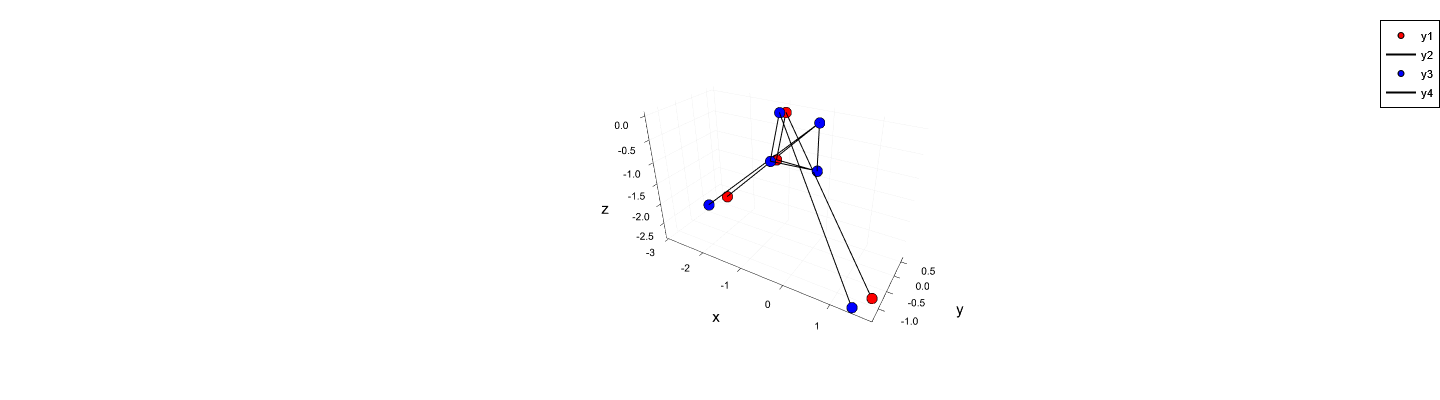

In [26]:
p = plot()
plotChain!(aux11,"red")
plotChain!(newQ2,"blue")
p

In [62]:
simulQ = PolygonalChain(Point[Point(2.700210962222457360466033949144789018008125582309552765292803943143816886264906, 0.3897418814769785367666768399143429047533643467115394917131502339959890577547612, 1.92522854240766213982230799945033864709636277352908657606264360286753136227333), Point(0.0, -4.318084277547222312693175931400199785558000182218140692511851735084295901581214e-78, -1.00000000000000002493936937754342523457281924693968516652908663019356442273618), Point(0.0, 0.0, 0.0), Point(1.0, 0.04912062829953418378092964365202036847440146906523536290956394464928247422246573, -0.001207146663804466356203776346191940871054308849201683155234318599404615158287831), Point(1.0, 0.505977343010382466439471452377205171704964969736773074624383335444967477445453, -0.8907474449210619393013272372530085553237832871899268972936596960703595676032663), Point(-1.80898753270713353677876289814488262523773944479085589248985568316546053239205, -1.193778740786800250587331612225800536205575469733740273719924358487527440759997, 1.394076026748107333867852568483596054921486228628194124683388967048137042988444)])
movQ  = getNth(1)

PolygonalChain(Point[Point(2.700210962222457360466033949144789018008125582309552765292803943143816886264906, -1.300140641481638120948051603751466324584441981308972846523913019145862496026012, -1.472425885077432701119080122511811778436900704387263161378032630610413784255264), Point(0.0, 0.499999999999999944488848768742172978818416595458984375, 0.86602540378443870761060452423407696187496185302734375), Point(0.0, 0.0, 0.0), Point(0.9987928533361955336739017001952968748968110634783878322039589095003132940946542, 0.04253971195724941627963596062642817605611150645932408749400576501245168219389999, -0.02456031414976708793868470249706950277396268526077082719197962448329941019827143), Point(1.023353167485962621612586402692366377670773748739158659395938533983612704292926, 0.04306242179572356671158662235424529795741166790833666879673803267109429387130821, 0.9751378991842817955618535618352571952786245677590342462463896903821734895500841), Point(-1.871148708293939208493372987495234564263039885442934

In [63]:
ls1,bas1,das1 = lengthsAndAngles(simulQ)
ls2,bas2,das2 = lengthsAndAngles(movQ)

(BigFloat[4.0, 1.00000000000000002493936937754342523457281924693968516652908663019356442273618, 0.9999999999999999999999999999999999999999999999999999999999999999999999999999914, 1.0, 3.999999999999999999999999999999999999999999999999999999999999999999999999999965], BigFloat[0.7505598546399696279439558383907038870040736412058470852038575416435928158098795, 1.570796326794896619231321691639751442098584699687552910487472296153908203143099, 1.570796326794896619231321691639751442098584699687552910487472296153908203143099, 0.7922476926991782769243760066190989535095740483091403777022018022523841011020144], BigFloat[-0.1924879720211956312478851930955586619151950970623710972712554927499711887925767, 0.5235987755982987945795993942169171874420796603608780761471826272161283259007975, -0.1651486774146268292773199818724039235445963157421868015170921407739490429599212])

In [64]:
ls1-ls2

5-element Vector{BigFloat}:
  7.556947684964243535872326236713796782371601682672696134094855055495819199451111e-18
 -2.493936937754342523457281924693968516652908663019356442273618025535905463153661e-17
  0.001206418940474498477994283807333379844778648184761450645449100034133482843688448
 -2.692606374739776579339430870447394576974075379333947849994342311350361393534623e-18
  1.338319024041265271952959595462164269649738086668781034521847300413031103088872e-16

In [65]:
bas1-bas2

4-element Vector{BigFloat}:
  4.119087399245467592133948163827890989192880654845463255854842700505662546544591e-17
 -0.001205692386143822682294729557924892470154349129878990921694942706407044668846645
  0.02348871964847182756277510763410265844863375784173028963360254804667463710057537
  8.476810037791283313343825211758791095475189604977140422225829930448565520168643e-18

In [66]:
das1-das2

3-element Vector{BigFloat}:
  0.09822158183538453432476009850610193080112850011251839663478066887951109135519506
 -0.04961728674936219544553773159290990951873112866185599366546948013338629349814763
  0.0431165469926584851237552676957335982039300298634629848291312828309664763027626

In [67]:
simulQ0 = PolygonalChain(Point[Point(2.700210962222457360466033949144789018008125582309552765292803943143816886264906, -1.300140641481638120948051603751466324584441981308972846523913019145862496026012, -1.472425885077432701119080122511811778436900704387263161378032630610413784255264), Point(0.0, 0.499999999999999944488848768742172978818416595458984375, 0.86602540378443870761060452423407696187496185302734375), Point(0.0, 0.0, 0.0), Point(1.0, 0.0, 0.0), Point(1.0, 0.0, 1.0), Point(-1.80898753270713353677876289814488262523773944479085589248985568316546053239205, 0.4681645887845222301414385272202335240843076320065559952939629611389503620496321, -1.80898753270713353677876289814488262523773944479085589248985568316546053239205)])

PolygonalChain(Point[Point(2.70021096222245748919021934852935373783111572265625, -1.3001406414816381040822079739882610738277435302734375, -1.4724258850774327722632506265654228627681732177734375), Point(0.0, 0.499999999999999944488848768742172978818416595458984375, 0.86602540378443870761060452423407696187496185302734375), Point(0.0, 0.0, 0.0), Point(1.0, 0.0, 0.0), Point(1.0, 0.0, 1.0), Point(-1.8089875327071336386097755166701972484588623046875, 0.468164588784522217590478021520539186894893646240234375, -1.8089875327071336386097755166701972484588623046875)])

In [68]:
ls01,bas01,das01 = lengthsAndAngles(simulQ0)

(BigFloat[4.000000000000000120897185789494040778086738983526210735174410881769483626858627, 1.00000000000000002493936937754342523457281924693968516652908663019356442273618, 1.0, 1.0, 4.000000000000000141552043628189783517948788494211614313542251347837155201279978], BigFloat[0.7505598546399696408584509893594456066971607918455965269339600524064066415841049, 1.570796326794896619231321691639751442098584699687552910487472296153908203143099, 1.570796326794896619231321691639751442098584699687552910487472296153908203143099, 0.7922476926991782760722840775921605939346436554502707138300284754008646700158408], BigFloat[-0.1433475689053653312099172410226753315923307020700059821184449893403025337888268, 0.5235987755982987945795993942169171874420796603608780761471826272161283259007888, -0.1651486774146268190512573155863188685108561728944673451691813408056634474313867])

In [56]:
ls02,bas02,das02 = lengthsAndAngles(Q)

(BigFloat[4.0, 1.00000000000000002493936937754342523457281924693968516652908663019356442273618, 1.0, 1.0, 3.999999999999999999999999999999999999999999999999999999999999999999999999999965], BigFloat[0.7505598546399696279439558383907038870040736412058470852038575416435928158098795, 1.570796326794896619231321691639751442098584699687552910487472296153908203143099, 1.570796326794896619231321691639751442098584699687552910487472296153908203143099, 0.7922476926991782769243760066190989535095740483091403777022018022523841011020144], BigFloat[-0.1433475689053653561542068121689824517293096676800468785212554927499711887925767, 0.5235987755982987945795993942169171874420796603608780761471826272161283259007888, -0.1651486774146268292773199818724039235445963157421868015170921407739490429599212])

In [59]:
bas01-bas02

4-element Vector{BigFloat}:
  1.291449515096874171969308715063974944173010251076281382577422536303909145811511e-17
  0.0
  0.0
 -8.520919290269383595749303928588696638721733268515194310861735285513224774120961e-19

In [71]:
inter_flag, simulQ2 = mutateChain(Q,1,-0.04914040311583027509367838092657621018588542938232421875,debug=true)

1
3
3,1
caso 2
4,1
caso 1
(2, 0.6331300408513973277006895671205616394709010560376247119458098138290084249239786, 1.791673368799715145602923014790640432654175673741291448069530928056560453243051)
la raíz esta bien
Point(0.990626285403162045471571629955285136548206024491922313884215588742740307798553, 0.1429845881359586603219108531319241691205976179565370997147946719383867581686414, 0.07317847585342553322059377878171984152685208362754461135322347321077320243586933)
-0.8660254037844386860124770889177668286036934036260618041013671848209573222374028,0.0
-0.08449922546572351738184472218973598388904559562890847773205009123938440793402413
0.1855720695892797870455351211138976053832867231042526039351824702541291811080571
4,2
caso 1
(0, 0.0, 0.0)
5,1
caso 1
(2, 0.8146381151814121788858111753798119341074781092024440499432108057268527472588394, 0.2365316631951519010134313185366935999750479624463610378584535661197648757938486)
la raíz esta bien
Point(0.50051619336536733155997977479347000264724557308

(false, PolygonalChain(Point[Point(2.700210962222457360466033949144789018008125582309552765292803943143816886264906, 0.3897418814769785367666768399143429047533643467115394917131502339959890577547612, 1.92522854240766213982230799945033864709636277352908657606264360286753136227333), Point(0.0, -4.318084277547222312693175931400199785558000182218140692511851735084295901581214e-78, -1.00000000000000002493936937754342523457281924693968516652908663019356442273618), Point(0.0, 0.0, 0.0), Point(1.0, 0.04912062829953418291830189401112740857440620588525196925224386888910705794465124, -0.001207146663804503669133574946595739480468911856760641033883429843849654995676061), Point(1.0, 0.5059773430103824476674363486345293050372044420842192153630633383313881039916519, -0.8907474449210619438689980658196375911281133251050278099416183852854375485913442), Point(-1.80898753270713353677876289814488262523773944479085589248985568316546053239205, -1.193778740786800203721894039774566493231103629953580535745661427

In [102]:
v=idxs[1]

2

In [103]:
a = ang_idxs[v]

1

In [104]:
phi = ang_vals[v]

-0.04914040311583027509367838092657621018588542938232421875

In [105]:
inter1,newQsimul = mutateChain(Q,a,phi)

(false, PolygonalChain(Point[Point(2.700210962222457360466033949144789018008125582309552765292803943143816886264906, 0.3897418814769785367666768399143429047533643467115394917131502339959890577547612, 1.92522854240766213982230799945033864709636277352908657606264360286753136227333), Point(0.0, -4.318084277547222312693175931400199785558000182218140692511851735084295901581214e-78, -1.00000000000000002493936937754342523457281924693968516652908663019356442273618), Point(0.0, 0.0, 0.0), Point(0.9987928533361955336739017001952968748968110634783878322039589095003132940946628, -0.04912062829953418255589215043292460371921855508550044005029551327328612730313044, 0.0), Point(1.023353167485962621612586402692366377670773748739158659395938533983612704292926, 0.4502757983685635163822856189186883755674564520453613591585296425348505581137584, -0.8660254037844386860124770889177668286036934036260618041013671848209573222374028), Point(-1.8711487082939392084933729874952345642630398854429343012705147621475674

In [106]:
ls11,bas11,das11 = lengthsAndAngles(newQsimul)

(BigFloat[4.0, 1.00000000000000002493936937754342523457281924693968516652908663019356442273618, 1.0, 0.9999999999999999999999999999999999999999999999999999999999999999999999999999914, 3.999999999999999999999999999999999999999999999999999999999999999999999999999931], BigFloat[0.7505598546399696279439558383907038870040736412058470852038575416435928158098795, 1.570796326794896619231321691639751442098584699687552910487472296153908203143099, 1.570796326794896619231321691639751442098584699687552910487472296153908203143082, 0.7922476926991782769243760066190989535095740483091403777022018022523841011020144], BigFloat[-0.1924879720211956312478851930955586619151950970623710972712554927499711887925789, 0.5235987755982987945795993942169171874420796603608780761471826272161283259007888, -0.1651486774146268292773199818724039235445963157421868015170921407739490429599191])

In [107]:
bas11-bas01

4-element Vector{BigFloat}:
 -1.291449515096874171969308715063974944173010251076281382577422536303909145811511e-17
  0.0
 -1.727233711018888925077270372560079914223200072887256277004740694033718360632485e-77
  8.520919290269383595749303928588696638721733268515194310861735285513224774120961e-19

In [85]:
aux1 = copy(Q)
rotate!(aux1,a,phi)
ls12,bas12,das12 = lengthsAndAngles(aux1)

(BigFloat[4.0, 1.00000000000000002493936937754342523457281924693968516652908663019356442273618, 0.9999999999999999999999999999999999999999999999999999999999999999999999999999914, 1.0, 3.999999999999999999999999999999999999999999999999999999999999999999999999999965], BigFloat[0.7505598546399696279439558383907038870040736412058470852038575416435928158098795, 1.570796326794896619231321691639751442098584699687552910487472296153908203143099, 1.570796326794896619231321691639751442098584699687552910487472296153908203143099, 0.7922476926991782769243760066190989535095740483091403777022018022523841011020144], BigFloat[-0.1924879720211956312478851930955586619151950970623710972712554927499711887925767, 0.5235987755982987945795993942169171874420796603608780761471826272161283259007975, -0.1651486774146268292773199818724039235445963157421868015170921407739490429599212])

In [90]:
das12-das01

3-element Vector{BigFloat}:
 -0.0491404031158303000379679520728833303228643949923651151528105034096686550037499
  8.636168555094444625386351862800399571116000364436281385023703470168591803162427e-78
 -1.022606266628608505503374014284771945634791079996828559552853451417293988618613e-17

In [98]:
newQsimul2 = moveBeforeDihedral(Q,a)
dihedralRotateFast!(newQsimul2,a,phi)

In [99]:
ls111,bas111,das111 = lengthsAndAngles(newQsimul2)

(BigFloat[4.0, 1.00000000000000002493936937754342523457281924693968516652908663019356442273618, 1.001206418940474498580434700776779001217366965352583510560017018404021860130222, 1.0, 3.999999999999999999999999999999999999999999999999999999999999999999999999999965], BigFloat[0.7505598546399696279439558383907038870040736412058470852038575416435928158098795, 1.569590634408752796535436448203449296183992430192106503721652771238061310272787, 1.594285046443368448829669569566327891212561967160946203965068165378240178849116, 0.7922476926991782769243760066190989535095740483091403777022018022523841011019798], BigFloat[-0.09426639018581110604272546599620704425107392252010323007150547569781699297630744, 0.4739814888489366239682644819101242973151842986959665902003469996024068005985322, -0.1220321304219683094848849901113375241546237890325345965001133288230704249497204])

In [100]:
bas111-bas01

4-element Vector{BigFloat}:
 -1.291449515096874171969308715063974944173010251076281382577422536303909145811511e-17
 -0.001205692386143822695885243436302145914592269495446406765819524915846892870311688
  0.02348871964847182959834787792657644911397726747339329347759586922433197570601691
  8.520919290269383595749303928588696638721733268515194310861389838771020996335946e-19